# Klasifikasi Citra Penyakit Radang Paru-Paru dan Paru Paru Terindikasi COVID19 Menggunakan Metode CNN

In [ ]:
import tensorflow as tf

Link Kaggle : https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia

# Load Data

In [ ]:
train_path = "datasplit/train"
val_path = "datasplit/val"
test_path = "datasplit/test"

# Preprocessing (Skenario 2)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
image_shape = (100,100,1)
batch_size = 64
augmen_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_path,
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

val_gen = augmen_gen.flow_from_directory(
    val_path,
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

test_gen = augmen_gen.flow_from_directory(
    test_path,
    target_size=(100,100),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',shuffle=False)

Found 3638 images belonging to 3 classes.
Found 1285 images belonging to 3 classes.
Found 645 images belonging to 3 classes.


# Modelling & Plotting (Skenario 9)

> Indented block



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[100,100,1]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.00001),
             metrics='accuracy')

In [ ]:
H = model.fit(train_gen, epochs=100, validation_data=val_gen, verbose=1)

Epoch 1/100
57/57 [==============================] - 514s 8s/step - loss: 0.8063 - accuracy: 0.6264 - val_loss: 1.0739 - val_accuracy: 0.3066
Epoch 2/100
57/57 [==============================] - 244s 4s/step - loss: 0.5622 - accuracy: 0.7647 - val_loss: 1.0079 - val_accuracy: 0.4716
Epoch 3/100
57/57 [==============================] - 166s 3s/step - loss: 0.4777 - accuracy: 0.7977 - val_loss: 0.9408 - val_accuracy: 0.6887
Epoch 4/100
57/57 [==============================] - 139s 2s/step - loss: 0.4433 - accuracy: 0.8235 - val_loss: 0.8481 - val_accuracy: 0.8623
Epoch 5/100
57/57 [==============================] - 138s 2s/step - loss: 0.4062 - accuracy: 0.8444 - val_loss: 0.7664 - val_accuracy: 0.8654
Epoch 6/100
57/57 [==============================] - 134s 2s/step - loss: 0.3970 - accuracy: 0.8450 - val_loss: 0.6692 - val_accuracy: 0.8786
Epoch 7/100
57/57 [==============================] - 135s 2s/step - loss: 0.3591 - accuracy: 0.8593 - val_loss: 0.5911 - val_accuracy: 0.8685
Epoch 

Epoch 58/100
57/57 [==============================] - 53s 928ms/step - loss: 0.1998 - accuracy: 0.9217 - val_loss: 0.1880 - val_accuracy: 0.9323
Epoch 59/100
57/57 [==============================] - 56s 987ms/step - loss: 0.1913 - accuracy: 0.9261 - val_loss: 0.1993 - val_accuracy: 0.9261
Epoch 60/100
57/57 [==============================] - 54s 945ms/step - loss: 0.1979 - accuracy: 0.9272 - val_loss: 0.2203 - val_accuracy: 0.9113
Epoch 61/100
57/57 [==============================] - 53s 937ms/step - loss: 0.1905 - accuracy: 0.9316 - val_loss: 0.1961 - val_accuracy: 0.9245
Epoch 62/100
57/57 [==============================] - 60s 1s/step - loss: 0.1902 - accuracy: 0.9272 - val_loss: 0.1951 - val_accuracy: 0.9276
Epoch 63/100
57/57 [==============================] - 72s 1s/step - loss: 0.1959 - accuracy: 0.9310 - val_loss: 0.1963 - val_accuracy: 0.9268
Epoch 64/100
57/57 [==============================] - 61s 1s/step - loss: 0.1972 - accuracy: 0.9230 - val_loss: 0.1913 - val_accuracy: 0

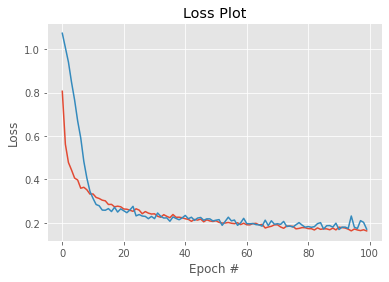

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

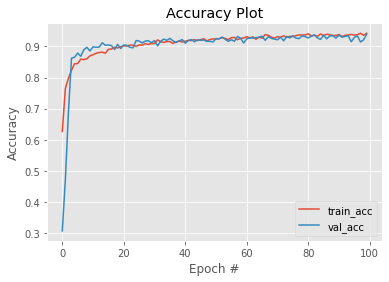

In [ ]:
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
pred = model.predict(test_gen)
predictions = np.argmax(pred, axis = 1)
# labels = (pred > 0.5).astype(np.int)
print(classification_report(test_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.93      0.87      0.90       159
           2       0.95      0.98      0.96       428

    accuracy                           0.94       645
   macro avg       0.94      0.92      0.93       645
weighted avg       0.94      0.94      0.94       645

